In [184]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [185]:

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [186]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

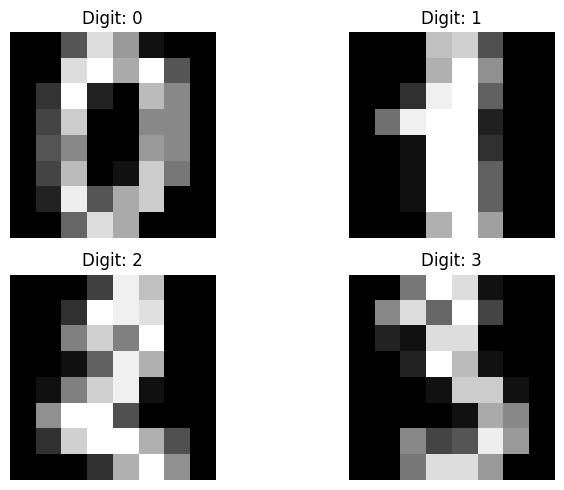

In [187]:
plt.gray()

plt.figure(figsize=(8, 5))  

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(digits.images[i], cmap='gray')  
    plt.title(f"Digit: {digits.target[i]}")
    plt.axis('off') 

plt.tight_layout()
plt.show()

In [188]:
df = pd.DataFrame(digits.data)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [189]:

df['target'] = digits.target

In [190]:

inputs = df.drop('target',axis='columns')
outputs = df.target

In [191]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs,test_size=0.2)

In [192]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, oob_score=True)


In [193]:
model.fit(X_train, y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [194]:
y_predicted = model.predict(X_test)

In [195]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

In [196]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

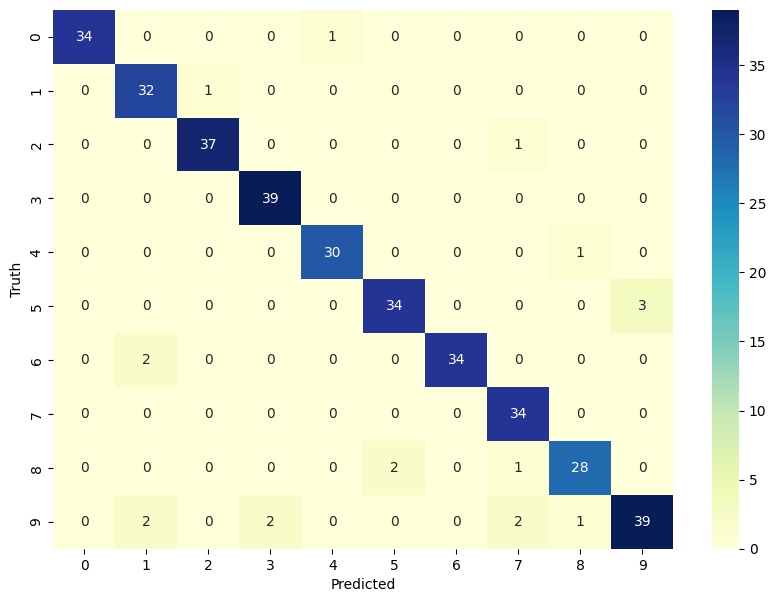

In [197]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [198]:
row = X_test.iloc[0].to_numpy()

In [199]:
row = row.reshape(1, -1)

In [200]:
print(row.shape)

(1, 64)


In [201]:
model.predict(row)

array([5])

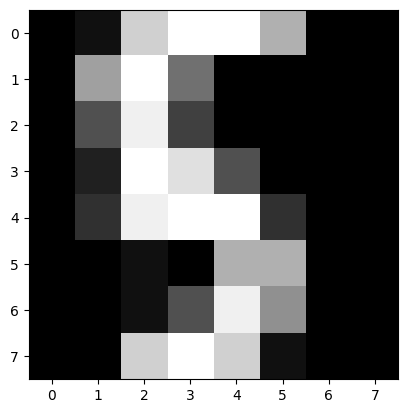

In [202]:
plt.imshow(row.reshape(8, 8))

In [204]:
print(f" The out of back estimation : {model.oob_score_}")
print(f"Model accuracy : {model.score(X_test, y_test)}")

 The out of back estimation : 0.929714683368128
Model accuracy : 0.9472222222222222


d:\sangita-mam\yolov1_widerface\venv\lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\sangita-mam\yolov1_widerface\venv\lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\sangita-mam\yolov1_widerface\venv\lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\sangita-mam\yolov1_widerface\venv\lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\sangita-mam\yolov1_widerface\venv\lib\site-packages\sklearn\ensemble\_forest.py:611: 

OOB Error by Number of Trees:
Trees:  10, OOB Error: 0.0779
Trees:  20, OOB Error: 0.0522
Trees:  30, OOB Error: 0.0466
Trees:  40, OOB Error: 0.0383
Trees:  50, OOB Error: 0.0348
Trees:  60, OOB Error: 0.0341
Trees:  70, OOB Error: 0.0299
Trees:  80, OOB Error: 0.0299
Trees:  90, OOB Error: 0.0313
Trees: 100, OOB Error: 0.0292
Trees: 110, OOB Error: 0.0299
Trees: 120, OOB Error: 0.0278
Trees: 130, OOB Error: 0.0278
Trees: 140, OOB Error: 0.0278
Trees: 150, OOB Error: 0.0271
Trees: 160, OOB Error: 0.0278
Trees: 170, OOB Error: 0.0278
Trees: 180, OOB Error: 0.0271
Trees: 190, OOB Error: 0.0278


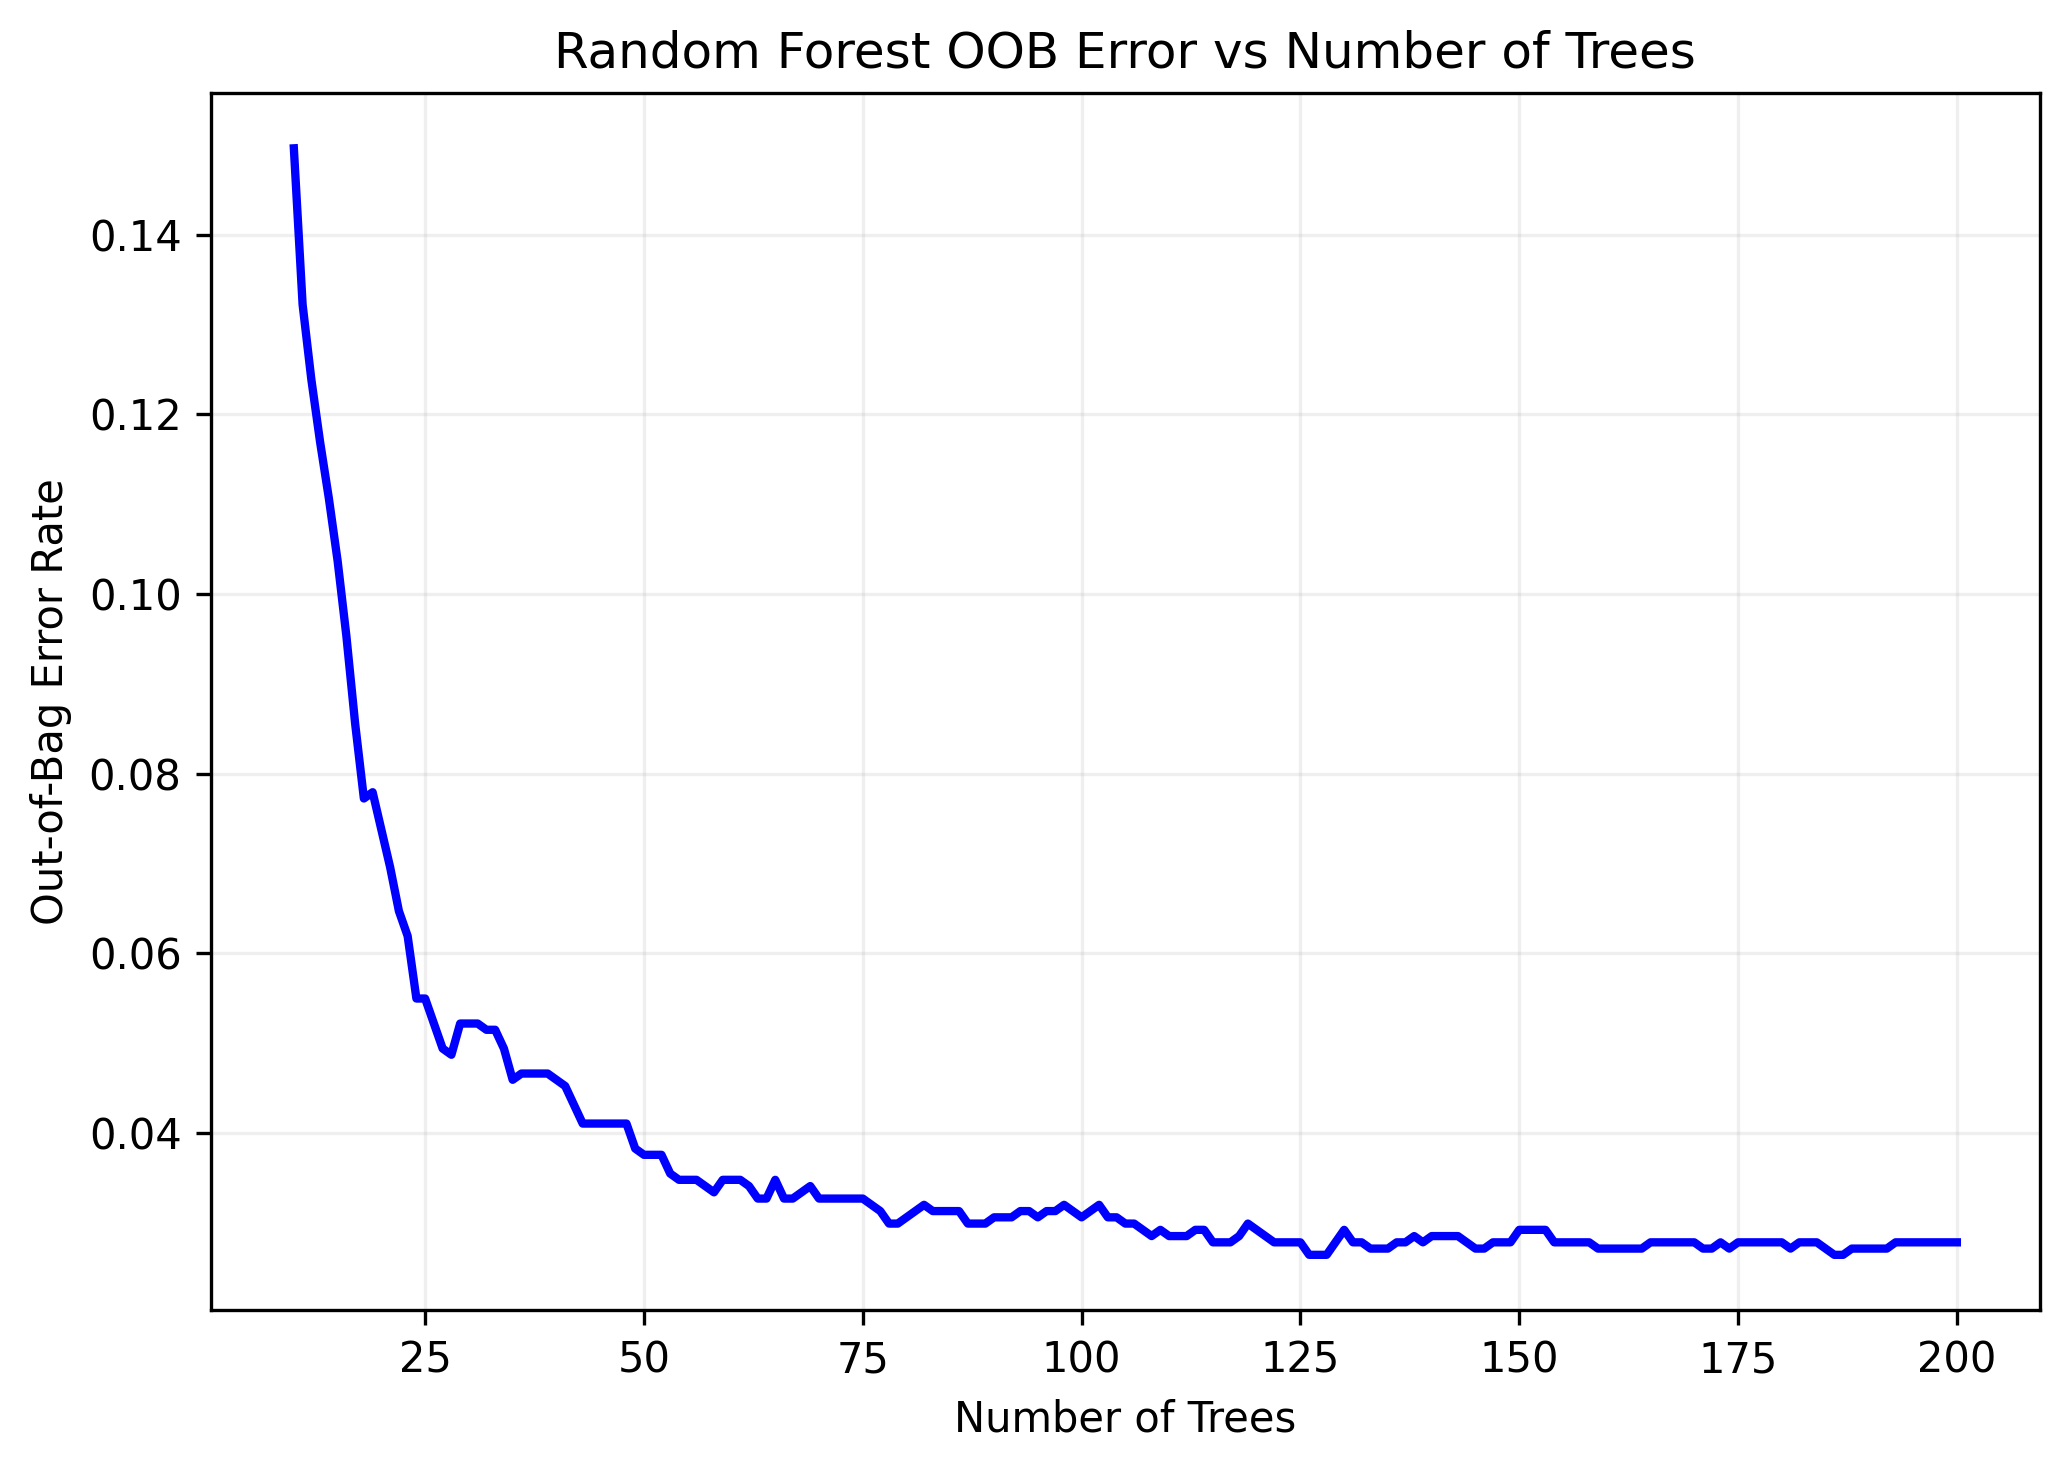

In [205]:
# Calculate OOB error for different numbers of trees
n_trees_range = range(10, 201)
oob_errors = [
    1 - RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42).fit(X_train, y_train).oob_score_
    for n in n_trees_range
]

# Create a plot
plt.figure(figsize=(7, 5), dpi=300)
plt.plot(n_trees_range, oob_errors, 'b-', linewidth=2)
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Error Rate')
plt.title('Random Forest OOB Error vs Number of Trees')
plt.grid(True, alpha=0.2)
plt.tight_layout()

# Print results at key intervals
print("OOB Error by Number of Trees:")
for i, error in enumerate(oob_errors, 1):
    if i % 10 == 0:
        print(f"Trees: {i:3d}, OOB Error: {error:.4f}")